<a href="https://colab.research.google.com/github/kenjiyamash1ta/ml_exam/blob/main/exam_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 1JU0C8SBlZODUXNc-JGkPn_1XSx30RPhV
## скачиваю зип файл датасета

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JU0C8SBlZODUXNc-JGkPn_1XSx30RPhV
To: /content/rus_cars.zip
100% 820k/820k [00:00<00:00, 38.2MB/s]


In [ ]:
! unzip /content/rus_cars.zip -d /content/rus_cars
##распаковка

Archive:  /content/rus_cars.zip
  inflating: /content/rus_cars/cars_dataset.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import matplotlib

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
## подключаем все нужные библиотеки

In [ ]:
df = pd.read_csv('/content/rus_cars/cars_dataset.csv', index_col = 'Unnamed: 0')
## читаем файл датасета

In [ ]:
df.head()

,mark,Box,Drive_unit,Seats,Doors,...,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,Mercedes-Benz,automatic,full,5.0,5.0,...,667.0,1941.0,11.5,9.2,9.8
1,Mercedes-Benz,automatic,full,5.0,5.0,...,667.0,1941.0,10.8,8.9,9.6
2,Mercedes-Benz,automatic,full,5.0,5.0,...,667.0,1941.0,14.1,10.8,12.1
3,Mercedes-Benz,automatic,full,5.0,5.0,...,667.0,1941.0,14.1,10.8,12.1
4,Mercedes-Benz,automatic,full,5.0,5.0,...,667.0,1941.0,14.1,10.8,12.1


Обучающая и тестовая выборка (train and test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42)
## разбиваем датасет на 2, тестовый и тренировочный

Валидационная выборка


In [ ]:
len(train) / len(df)
## сравнения размеров

0.5999911902035063

In [ ]:
len(test) / len(df)
## сравнения размеров

0.4000088097964937

In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=42)
##тестовый разбиваем еще на 2, на тест и на вал

In [ ]:
len(train) / len(df)
## сравнения размеров

0.5999911902035063

In [ ]:
len(val) / len(df)
## сравнения размеров

0.1999823804070126

In [ ]:
len(test) / len(df)
## сравнения размеров

0.2000264293894811

Список фичей

In [ ]:
train.columns
##выводим колоныки

Index(['mark', 'Box', 'Drive_unit', 'Seats', 'Doors', 'Country', 'Engine',
       'Volume', 'Color', 'Mileage', 'Price', 'Year', 'Car_type', 'Generation',
       'Model', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_brakes',
       'Engine_volume', 'Width', 'Front_Suspension_type',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Car_class', 'Wheelbase', 'Cylinders', 'Height', 'Fuel', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank', 'Rear_track_width',
       'Front_track_width', 'Curb_weight_kg', 'Clearance', 'Engine_Location',
       'Maximum_speed', 'Wheel_size', 'Transmissions', 'Speed_to_100',
       'Full_weight', 'Compression_ratio', 'Consumption', 'Engine_Power',
       'Restyling', 'Release_start_series', 'End_Serial', 'Trunk_volume_max',
       'Trunk_volume_min', 'Expense_city', 'Expense_track',
       'Consumption_average'],
      dtype='object')

*  'mark' - марка
*  'Box' - кпп
*  'Drive_unit' - привод
*  'Seats' - седения
*  'Doors' - двери
*  'Country' - страна
*  'Engine' - топливо
*  'Volume' - обьем двиг
*  'Color' - цвет
*  'Mileage' - пробег в милях
*  'Price' - цена
*  'Year' - год
*  'Car_type' - тип кузова
*  'Generation' - поколение
*  'Model' - модель
*  'Drive' - привод
*  'Boost_type' - турбо
*  'Cylinder_location' - местоположение целиндра
*  'Front_brakes' - Передние тормоза
*  'Engine_volume' - Объем двигателя
*  'Width' - вес
*  'Front_Suspension_type' - тип передней подвески
*  'Diameter_cylinder_and_stroke_piston' - диаметр целиндра и строки пистона
*  'Maximum_power' - максимальная мощность
*  'Length' - длина
*  'Car_class' - класс автомобиля
*  'Wheelbase' - колесная база
*  'Cylinders' - целиндры
*  'Height'- высота
*  'Fuel' - топливо
*  'Torque' - вращающий момент
*  'Valves_per_cylinder' - клапаны
*  'Volume_fuel_tank' - обьем полного бака
*  'Rear_track_width' - ширина заднего хода
*  'Front_track_width' - ширина переднего хода
*  'Curb_weight_kg' - снаряженная масса
*  'Clearance' - клиренс
*  'Engine_Location' - положение двигателя
*  'Maximum_speed' - максимальная скорость
*  'Wheel_size' - размер колес
*  'Transmissions' - трансмиссия
*  'Speed_to_100' - разгон до 100
*  'Full_weight' - полный вес
*  'Compression_ratio' - коэффицент сжатия
*  'Consumption' - потребление
*  'Engine_Power' - впрыск
*  'Restyling' - рестайлинг
*  'Release_start_series' - выпуск 1 серии
*  'End_Serial' - последняя серия
*  'Trunk_volume_max' - максимальны1 обьем багажника
*  'Trunk_volume_min' - минимальный обьем багажника
*  'Expense_city' - расход топлива в городе
*  'Expense_track' - расход топлива на трассе
*  'Consumption_average' - расход в среднем




In [ ]:
train

,mark,Box,Drive_unit,Seats,Doors,...,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
1301,Hyundai,automatic,front,5.0,4.0,...,480.0,0.0,8.9,5.3,6.6
30669,Ford,mechanics,front,5.0,4.0,...,490.0,0.0,0.0,0.0,0.0
10569,Mitsubishi,mechanics,front,5.0,4.0,...,430.0,0.0,0.0,0.0,0.0
31024,GAZ,mechanics,full,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0
1178,Mercedes-Benz,automatic,full,5.0,5.0,...,655.0,1790.0,11.7,7.9,9.3
...,...,...,...,...,...,...,...,...,...,...,...
19537,BMW,automatic,full,5.0,5.0,...,465.0,1550.0,12.3,8.2,9.7
34835,Mercedes-Benz,automatic,rear,5.0,4.0,...,430.0,0.0,13.5,7.3,9.6
8647,Volkswagen,automatic,full,5.0,5.0,...,555.0,1570.0,18.0,9.2,12.4
884,Jeep,automatic,full,5.0,5.0,...,553.0,1044.0,0.0,0.0,0.0


In [ ]:
# просмотр пустых данных столбцов
cols = df.apply(lambda x: f'{(x.isna().sum()/df.shape[0]).round(3)} %').sort_values(ascending = False)
cols

Engine_Power                           0.157 %
Wheel_size                             0.068 %
Engine_Location                         0.06 %
Fuel                                   0.018 %
Boost_type                             0.012 %
Cylinder_location                      0.011 %
Car_class                               0.01 %
Front_Suspension_type                  0.008 %
Front_brakes                           0.008 %
Drive                                  0.008 %
Consumption                              0.0 %
Compression_ratio                        0.0 %
Volume_fuel_tank                         0.0 %
Rear_track_width                         0.0 %
Front_track_width                        0.0 %
Expense_track                            0.0 %
Curb_weight_kg                           0.0 %
Clearance                                0.0 %
Expense_city                             0.0 %
Trunk_volume_min                         0.0 %
Maximum_speed                            0.0 %
Trunk_volume_

In [ ]:
#удаляем столбцы, в которых пустые данные > 0.1
df = df[cols[1:].index.to_list()]
df.sample()

,Wheel_size,Engine_Location,Fuel,Boost_type,Cylinder_location,...,Maximum_power,Length,Wheelbase,Box,Consumption_average
19632,245/70/R16,"front, longitudinal",AI-95,no,V-type,...,215.0,4795.0,2760.0,automatic,0.0


In [ ]:
pd.set_option('display.max_columns', None)
df.corr()[df.corr()>0.8]

,Consumption,Compression_ratio,Volume_fuel_tank,Rear_track_width,Front_track_width,Expense_track,Curb_weight_kg,Clearance,Expense_city,Trunk_volume_min,Maximum_speed,Trunk_volume_max,End_Serial,Release_start_series,Restyling,Valves_per_cylinder,Transmissions,Speed_to_100,Full_weight,Cylinders,Torque,Year,Seats,Doors,Volume,Mileage,Price,Height,Engine_volume,Width,Diameter_cylinder_and_stroke_piston,Maximum_power,Length,Wheelbase,Consumption_average
Consumption,1.000000,NaN,NaN,NaN,NaN,0.811306,NaN,NaN,0.820439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825635
Compression_ratio,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume_fuel_tank,NaN,NaN,1.000000,NaN,NaN,NaN,0.836723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rear_track_width,NaN,NaN,NaN,1.00000,0.954790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.855650,NaN,NaN,NaN,NaN,NaN
Front_track_width,NaN,NaN,NaN,0.95479,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869744,NaN,NaN,NaN,NaN,NaN
Expense_track,0.811306,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.965771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990967
Curb_weight_kg,NaN,NaN,0.836723,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.801804,NaN,NaN,NaN,NaN,NaN
Clearance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expense_city,0.820439,NaN,NaN,NaN,NaN,0.965771,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.988519
Trunk_volume_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(['Volume','Cylinders', 'Release_start_series',
         'End_Serial', 'Maximum_power', 'Expense_track',
         'Expense_city', 'Consumption_average', 'Rear_track_width',
         'Front_track_width', 'Curb_weight_kg', 'Volume_fuel_tank','Wheelbase'], axis = 1, inplace = True)
##выкидываем неподходящие столбики

In [ ]:
pd.set_option('display.max_columns', 10)
df.head()

,Wheel_size,Engine_Location,Fuel,Boost_type,Cylinder_location,...,Engine_volume,Width,Diameter_cylinder_and_stroke_piston,Length,Box
0,265/60/R18,"front, longitudinal",diesel,turbocharging,in-line,...,2925.0,1931.0,0.0,4817.0,automatic
1,NaN,"front, longitudinal",diesel,turbocharging,in-line,...,2925.0,1931.0,82.0,4817.0,automatic
2,265/60/R18,"front, longitudinal",AI-95,turbocharging,V-type,...,3982.0,1931.0,83.0,4817.0,automatic
3,265/60/R18,"front, longitudinal",AI-95,turbocharging,V-type,...,3982.0,1931.0,83.0,4817.0,automatic
4,265/60/R18,"front, longitudinal",AI-95,turbocharging,V-type,...,3982.0,1931.0,83.0,4817.0,automatic


Визуализация данных

<Axes: title={'center': 'тип данных'}>

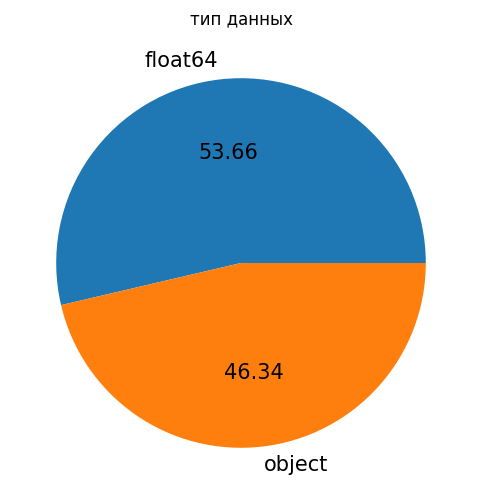

In [ ]:
pd.Series([df[i].dtype for i in df.columns]).value_counts().plot(
                                    kind = 'pie', autopct="%.2f",
                                    title = "тип данных",
                                    fontsize=15,
                                    figsize=(6, 6))
## деление колон по типам данных

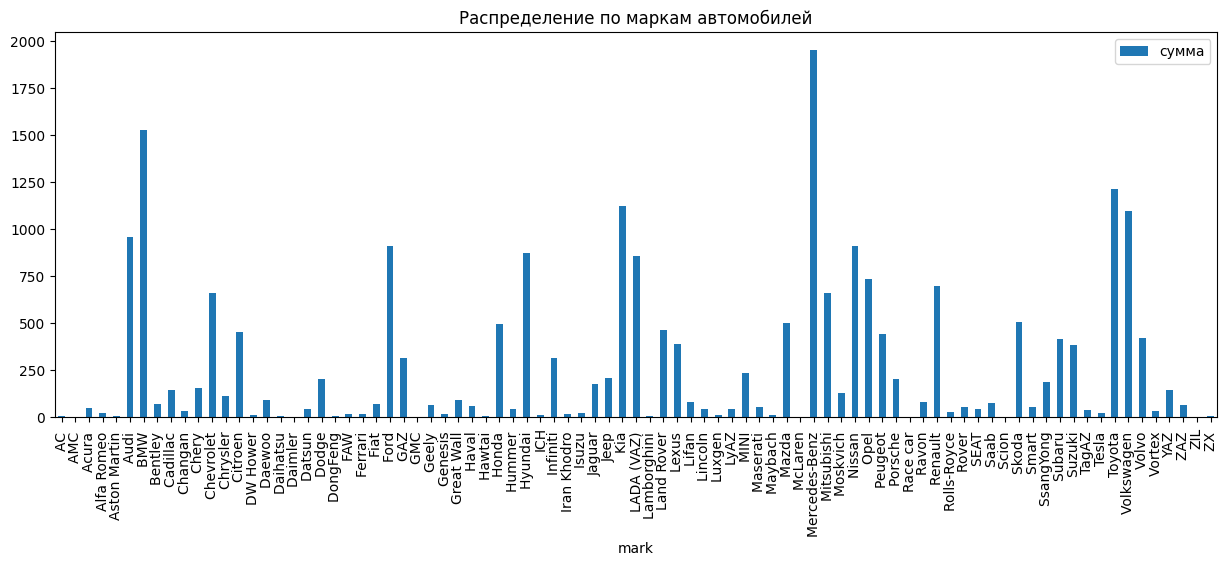

In [ ]:
plt.figure(figsize=(16,8))
df.groupby(['mark']).size().plot(kind = 'bar',figsize=(15,5), title = 'Распределение по маркам автомобилей', label = 'сумма')
plt.legend()

In [ ]:
def millions(x, pos):
    return '{:,.1f}M'.format(x*1e-6)
fmtr = matplotlib.ticker.FuncFormatter(millions)

In [ ]:
train.columns

Index(['mark', 'Box', 'Drive_unit', 'Seats', 'Doors', 'Country', 'Engine',
       'Volume', 'Color', 'Mileage', 'Price', 'Year', 'Car_type', 'Generation',
       'Model', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_brakes',
       'Engine_volume', 'Width', 'Front_Suspension_type',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Car_class', 'Wheelbase', 'Cylinders', 'Height', 'Fuel', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank', 'Rear_track_width',
       'Front_track_width', 'Curb_weight_kg', 'Clearance', 'Engine_Location',
       'Maximum_speed', 'Wheel_size', 'Transmissions', 'Speed_to_100',
       'Full_weight', 'Compression_ratio', 'Consumption', 'Engine_Power',
       'Restyling', 'Release_start_series', 'End_Serial', 'Trunk_volume_max',
       'Trunk_volume_min', 'Expense_city', 'Expense_track',
       'Consumption_average'],
      dtype='object')

Медиана стоимости равна 680000 рублей


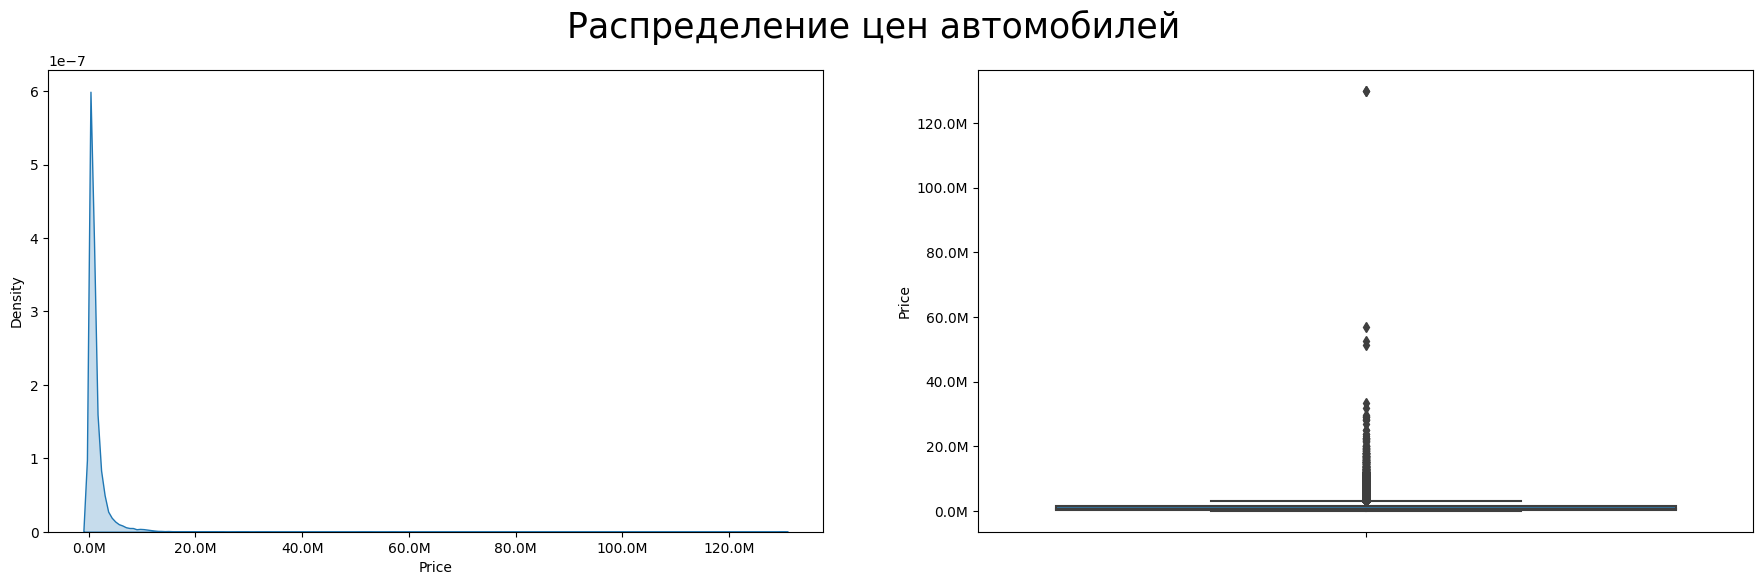

In [ ]:
print(f'Медиана стоимости равна {int(df.Price.median())} рублей')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(df.Price, shade=True)
_ = ax.xaxis.set_major_formatter(fmtr)

plt.subplot(1,2,2)
ax = sns.boxplot(y=df.Price)
_ = ax.yaxis.set_major_formatter(fmtr)

fig.suptitle("Распределение цен автомобилей",fontsize=25)
plt.show()

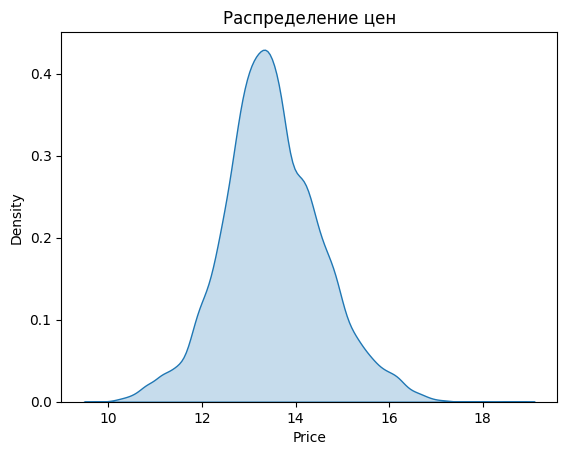

In [ ]:
sns.kdeplot(np.log(df.Price), shade=True)
plt.title('Распределение цен')
plt.show()

In [ ]:
def get_cols(df) -> list:
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

In [ ]:
pd.set_option('display.max_columns', 10)
df.head()

,Wheel_size,Engine_Location,Fuel,Boost_type,Cylinder_location,...,Engine_volume,Width,Diameter_cylinder_and_stroke_piston,Length,Box
0,265/60/R18,"front, longitudinal",diesel,turbocharging,in-line,...,2925.0,1931.0,0.0,4817.0,automatic
1,NaN,"front, longitudinal",diesel,turbocharging,in-line,...,2925.0,1931.0,82.0,4817.0,automatic
2,265/60/R18,"front, longitudinal",AI-95,turbocharging,V-type,...,3982.0,1931.0,83.0,4817.0,automatic
3,265/60/R18,"front, longitudinal",AI-95,turbocharging,V-type,...,3982.0,1931.0,83.0,4817.0,automatic
4,265/60/R18,"front, longitudinal",AI-95,turbocharging,V-type,...,3982.0,1931.0,83.0,4817.0,automatic


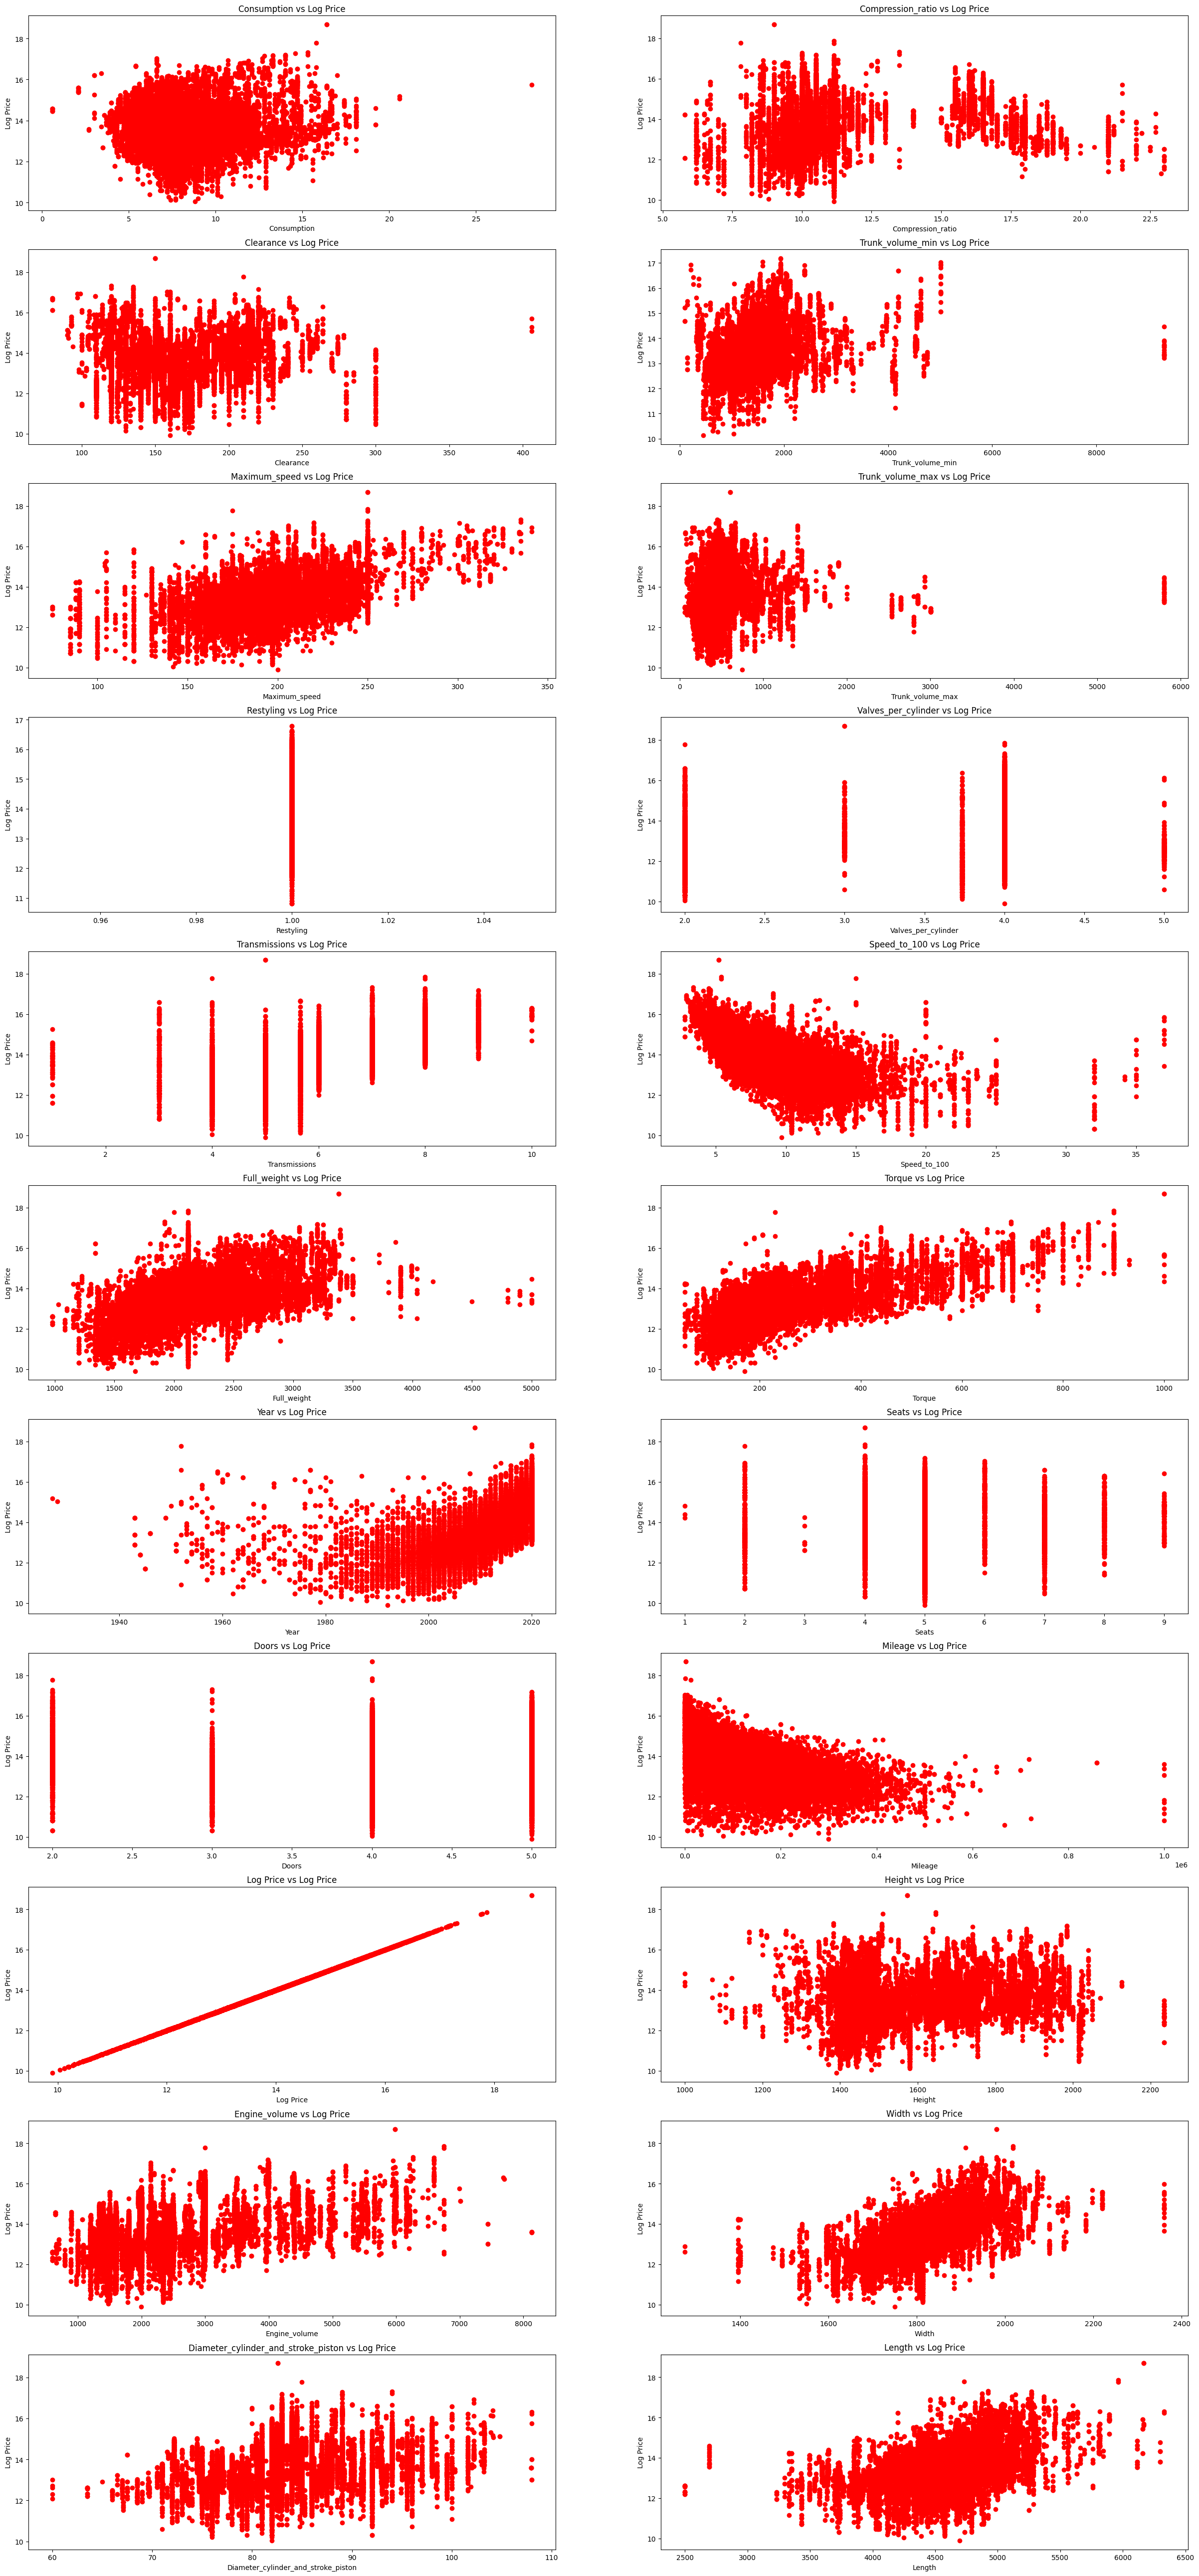

In [ ]:
def scatter(column,fig):
    plt.subplot(33,2,fig)
    ax = plt.scatter(
        x=[price if 'Price' not in column else np.log(price) for price in df[df[column] > 0][column]],
        y=np.log(df[df[column] > 0].Price),
        color = 'red'
    )
    plt.title(f'{column} vs Log Price', fontsize=40)
    plt.title(f'{column} vs Log Price' if 'Price' not in column else f'Log {column} vs Log Price')
    plt.ylabel('Log Price')
    plt.xlabel(column if 'Price' not in column else f'Log {column}')

plt.figure(figsize=(30,200))

for i, column in enumerate(numbers_cols):
    scatter(column, i + 1)

<Axes: title={'center': 'Correlation with the target column'}>

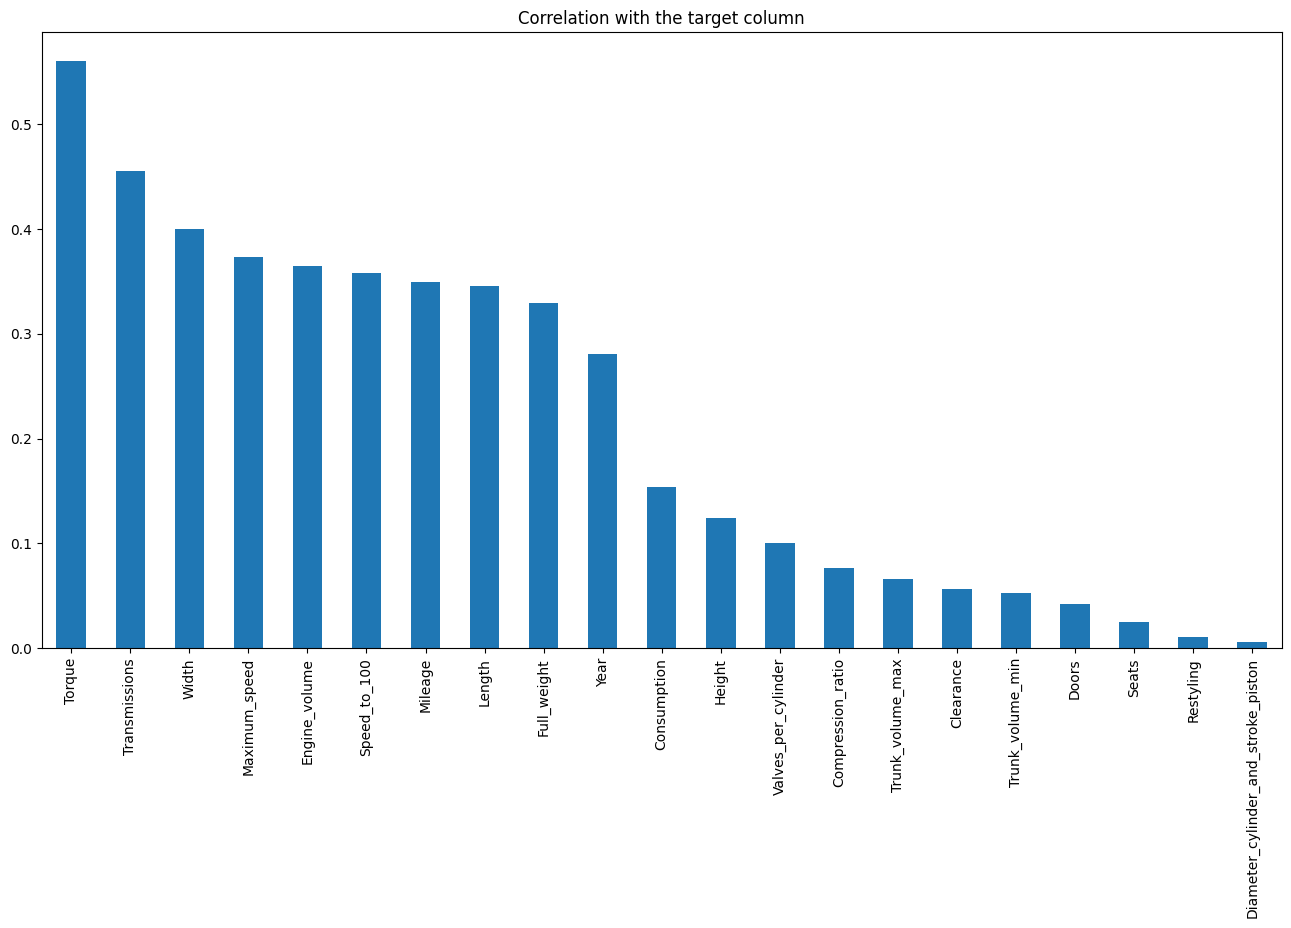

In [ ]:
plt.figure(figsize=(16,8))
abs(df.corr()['Price']).sort_values(ascending = False)[1:].plot(kind = 'bar', title = 'Correlation with the target column')

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# cars_dataset.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/rus_cars/cars_dataset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'cars_dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')






##этот весь код для создания матриц снизу

There are 1000 rows and 55 columns


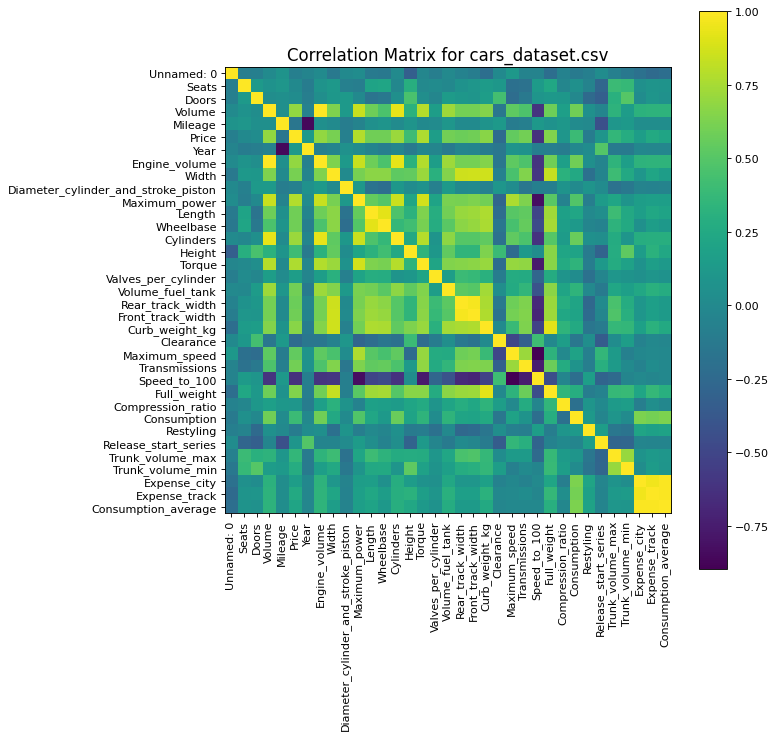

In [ ]:
plotCorrelationMatrix(df1, 9)

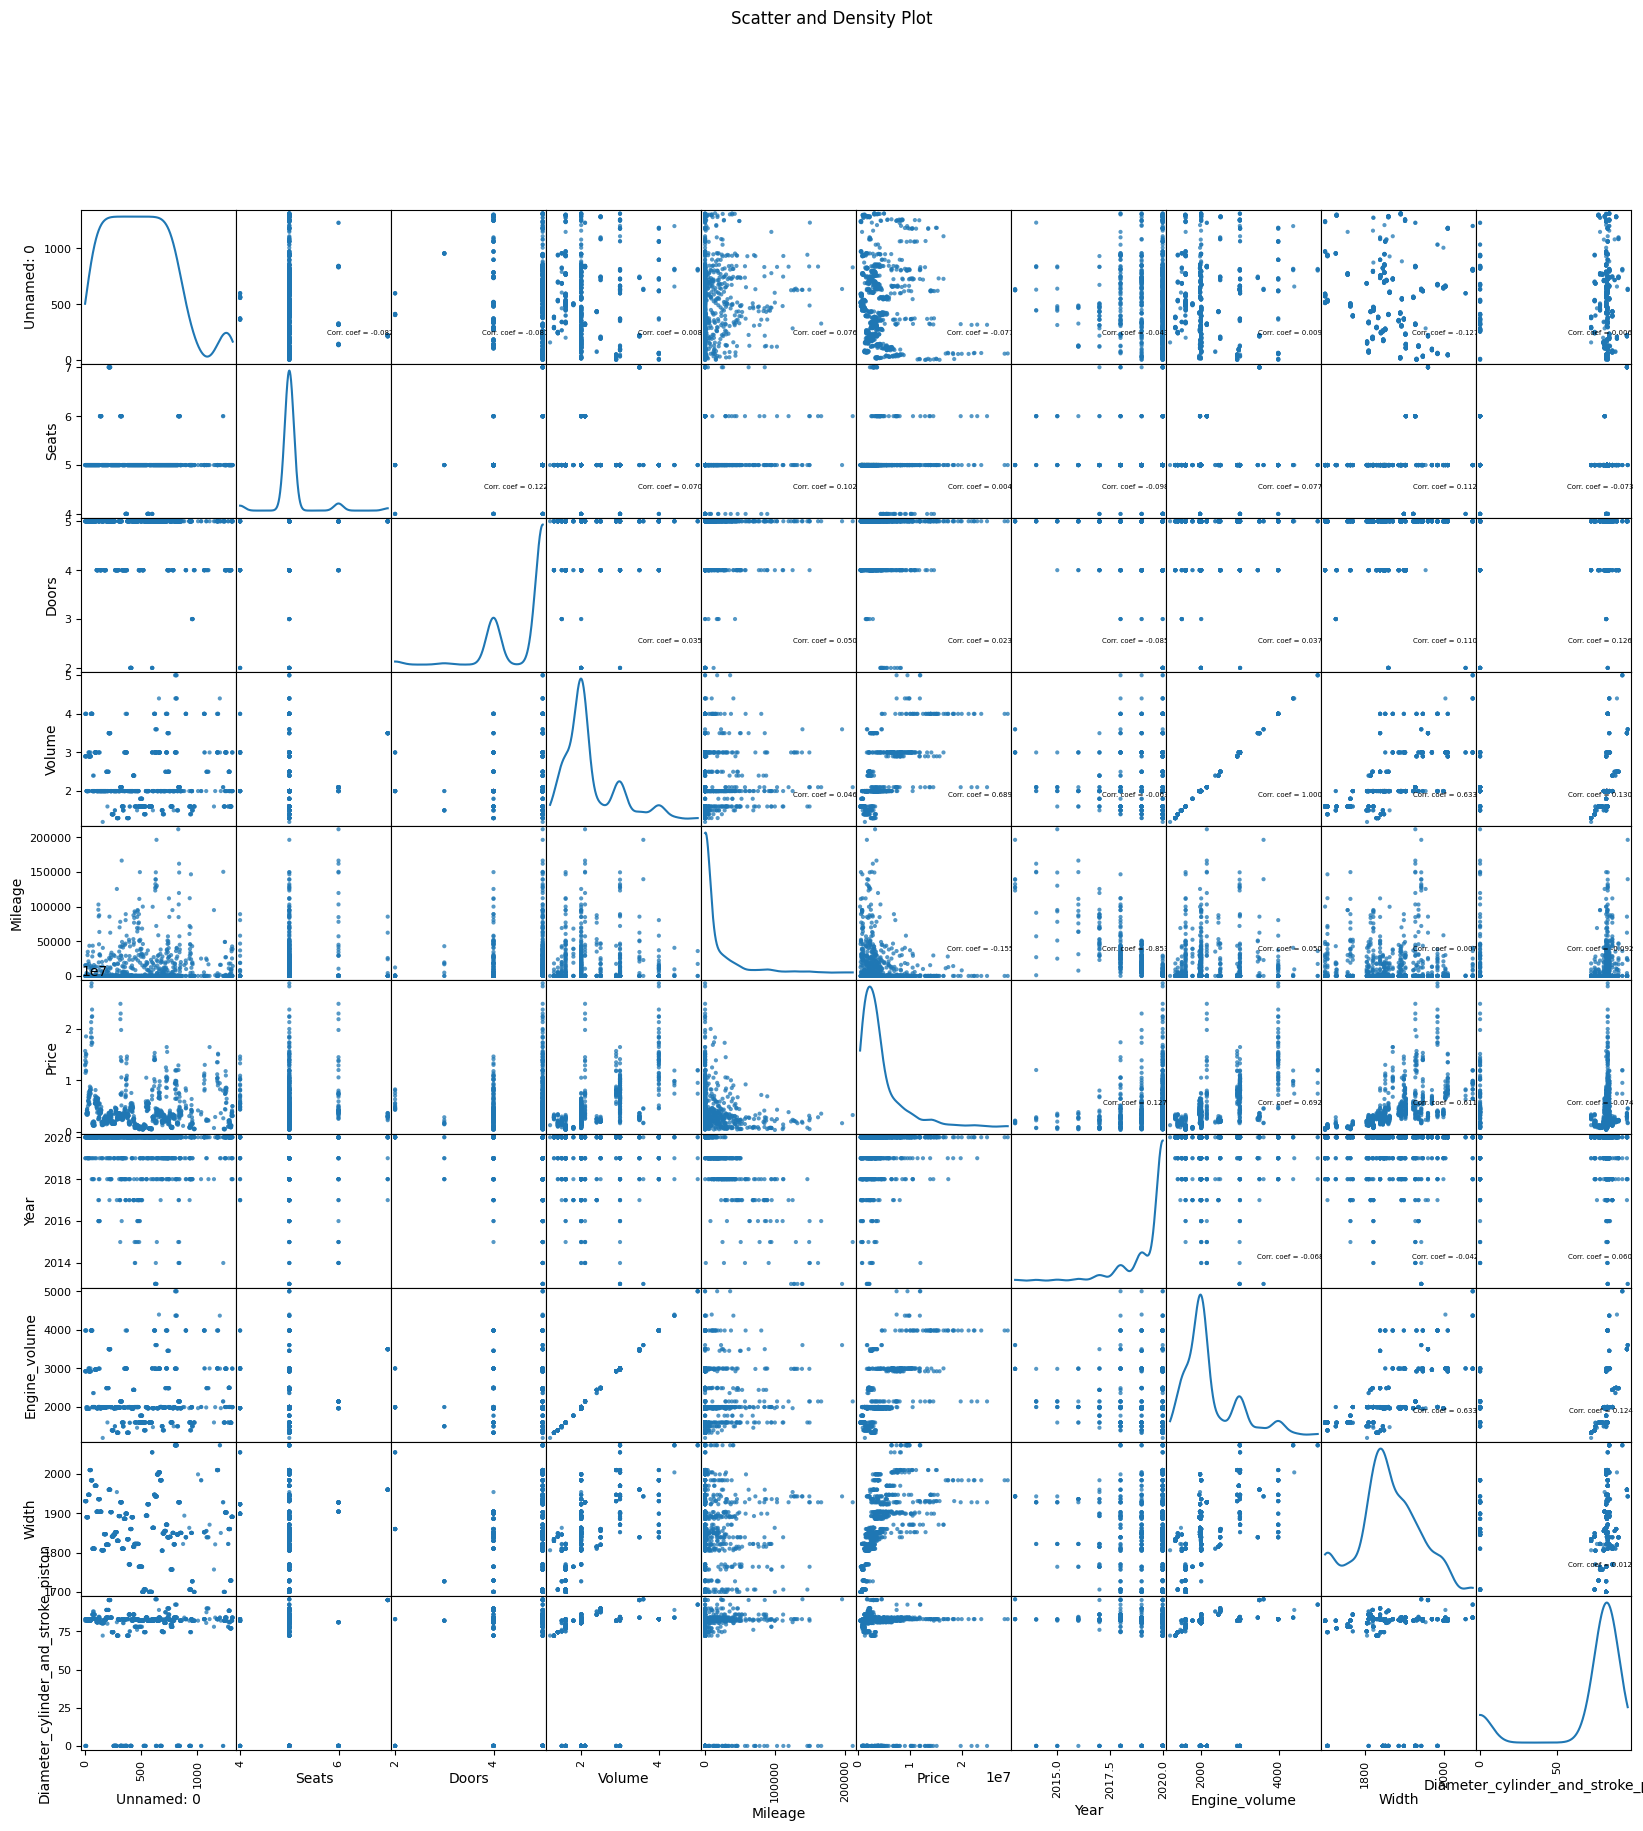

In [ ]:
plotScatterMatrix(df1, 20, 5)

In [ ]:
X = ['mark', 'Seats', 'Doors', 'Engine', 'Mileage', 'Year',
       'Model', 'Engine_volume', 'Width',
       'Diameter_cylinder_and_stroke_piston', 'Length', 'Wheelbase', 'Height', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank',
       'Clearance',
       'Maximum_speed', 'Transmissions', 'Speed_to_100',
       'Full_weight', 'Compression_ratio', 'Consumption',
       'Restyling']

cat_features = ['mark', 'Model', 'Engine']

y = ['Price']
## подбираем х и у

In [ ]:
train

,mark,Box,Drive_unit,Seats,Doors,...,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
1301,Hyundai,automatic,front,5.0,4.0,...,480.0,0.0,8.9,5.3,6.6
30669,Ford,mechanics,front,5.0,4.0,...,490.0,0.0,0.0,0.0,0.0
10569,Mitsubishi,mechanics,front,5.0,4.0,...,430.0,0.0,0.0,0.0,0.0
31024,GAZ,mechanics,full,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0
1178,Mercedes-Benz,automatic,full,5.0,5.0,...,655.0,1790.0,11.7,7.9,9.3
...,...,...,...,...,...,...,...,...,...,...,...
19537,BMW,automatic,full,5.0,5.0,...,465.0,1550.0,12.3,8.2,9.7
34835,Mercedes-Benz,automatic,rear,5.0,4.0,...,430.0,0.0,13.5,7.3,9.6
8647,Volkswagen,automatic,full,5.0,5.0,...,555.0,1570.0,18.0,9.2,12.4
884,Jeep,automatic,full,5.0,5.0,...,553.0,1044.0,0.0,0.0,0.0


In [ ]:
train['Box']

1301     automatic
30669    mechanics
10569    mechanics
31024    mechanics
1178     automatic
           ...    
19537    automatic
34835    automatic
8647     automatic
884      automatic
25430    mechanics
Name: Box, Length: 13621, dtype: object

In [ ]:
pd.get_dummies(train['Fuel'])

,AI-76,AI-80,AI-92,AI-95,AI-98,GAZ,diesel
1301,0,0,1,0,0,0,0
30669,0,0,0,1,0,0,0
10569,0,0,0,1,0,0,0
31024,0,1,0,0,0,0,0
1178,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
19537,0,0,0,0,0,0,1
34835,0,0,0,1,0,0,0
8647,0,0,0,1,0,0,0
884,0,0,0,1,0,0,0


In [ ]:
pd.get_dummies(train['Box'])

,automatic,mechanics,robot,variator
1301,1,0,0,0
30669,0,1,0,0
10569,0,1,0,0
31024,0,1,0,0
1178,1,0,0,0
...,...,...,...,...
19537,1,0,0,0
34835,1,0,0,0
8647,1,0,0,0
884,1,0,0,0


Первый запуск Кэтбуста

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
df['Mileage'] = df['Mileage'].astype(int)

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))
##первый запуск модели

Learning rate set to 0.07673
0:	learn: 2.2246124	test: 2.2887090	best: 2.2887090 (0)	total: 18.5ms	remaining: 18.5s
100:	learn: 0.4256793	test: 0.4447347	best: 0.4447347 (100)	total: 1.63s	remaining: 14.5s
200:	learn: 0.3141454	test: 0.3272225	best: 0.3272225 (200)	total: 3.27s	remaining: 13s
300:	learn: 0.2786320	test: 0.2893101	best: 0.2893101 (300)	total: 4.83s	remaining: 11.2s
400:	learn: 0.2596798	test: 0.2726999	best: 0.2726999 (400)	total: 7.39s	remaining: 11s
500:	learn: 0.2452689	test: 0.2607633	best: 0.2607594 (497)	total: 9.34s	remaining: 9.31s
600:	learn: 0.2354106	test: 0.2537647	best: 0.2537647 (600)	total: 10.9s	remaining: 7.25s
700:	learn: 0.2260759	test: 0.2469829	best: 0.2469500 (699)	total: 13.2s	remaining: 5.63s
800:	learn: 0.2168730	test: 0.2411961	best: 0.2411467 (799)	total: 14.7s	remaining: 3.66s
900:	learn: 0.2108722	test: 0.2386792	best: 0.2386792 (900)	total: 16.4s	remaining: 1.8s
999:	learn: 0.2045852	test: 0.2352215	best: 0.2351648 (996)	total: 18.7s	remain

In [ ]:
test['price_pred_all'] = model.predict(test[X])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))
## функция для выведения ошибки абсолютной и процентной

In [ ]:
error(test['Price'],test['price_pred_all'])
##ошибка собственно

210940.2059228542
0.23740299668902518


обучаем на всех данных

In [ ]:
print(len(train) + len(val))
print(len(train))
print(len(val))

18161
13621
4540


In [ ]:
train_full = pd.concat([train,val])

In [ ]:
X = ['mark', 'Seats', 'Doors', 'Engine', 'Mileage', 'Year',
       'Model', 'Engine_volume', 'Width',
       'Diameter_cylinder_and_stroke_piston', 'Length', 'Wheelbase', 'Height', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank',
       'Clearance',
       'Maximum_speed', 'Transmissions', 'Speed_to_100',
       'Full_weight', 'Compression_ratio', 'Consumption',
       'Restyling']

cat_features = ['mark', 'Model', 'Engine']

y = ['Price']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))
##обучение на 2/3 датасетов на которые мы разбивали выше

0:	learn: 2.2187197	test: 2.2827029	best: 2.2827029 (0)	total: 40.3ms	remaining: 40.3s
100:	learn: 0.4025608	test: 0.4363930	best: 0.4363930 (100)	total: 3.55s	remaining: 31.6s
200:	learn: 0.3095129	test: 0.3333479	best: 0.3333479 (200)	total: 5.11s	remaining: 20.3s
300:	learn: 0.2746018	test: 0.2995112	best: 0.2995112 (300)	total: 6.61s	remaining: 15.3s
400:	learn: 0.2531854	test: 0.2781077	best: 0.2781077 (400)	total: 8.14s	remaining: 12.2s
500:	learn: 0.2386960	test: 0.2630571	best: 0.2629235 (498)	total: 9.65s	remaining: 9.61s
600:	learn: 0.2280583	test: 0.2520491	best: 0.2519701 (598)	total: 11.2s	remaining: 7.44s
700:	learn: 0.2195125	test: 0.2451413	best: 0.2451413 (700)	total: 12.8s	remaining: 5.45s
800:	learn: 0.2121334	test: 0.2397377	best: 0.2397377 (800)	total: 15.6s	remaining: 3.88s
900:	learn: 0.2051766	test: 0.2351949	best: 0.2351949 (900)	total: 17.4s	remaining: 1.91s
999:	learn: 0.1990605	test: 0.2317676	best: 0.2317172 (998)	total: 19s	remaining: 0us

bestTest = 0.231

In [ ]:
model.best_iteration_

998

In [ ]:
parameters = {'iterations': model.best_iteration_ + 1,
              'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [ ]:
parameters

{'iterations': 999,
 'cat_features': ['mark', 'Model', 'Engine'],
 'eval_metric': 'MAPE',
 'learning_rate': 0.08,
 'random_seed': 42,
 'verbose': 100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train_full[X],train_full[y])

Learning rate set to 0.064733
0:	learn: 2.3077280	total: 67.4ms	remaining: 1m 7s
100:	learn: 0.4500096	total: 3.75s	remaining: 33.4s
200:	learn: 0.3172961	total: 5.44s	remaining: 21.6s
300:	learn: 0.2828951	total: 7.11s	remaining: 16.5s
400:	learn: 0.2618776	total: 8.83s	remaining: 13.2s
500:	learn: 0.2463455	total: 10.6s	remaining: 10.6s
600:	learn: 0.2361270	total: 13.9s	remaining: 9.26s
700:	learn: 0.2281651	total: 15.7s	remaining: 6.7s
800:	learn: 0.2231409	total: 17.5s	remaining: 4.33s
900:	learn: 0.2168281	total: 19.2s	remaining: 2.11s
999:	learn: 0.2110928	total: 21s	remaining: 0us


In [ ]:
test['price_pred_all_features_and_data'] = model.predict(test[X])

In [ ]:
error(test['Price'],test['price_pred_all'])

210940.2059228542
0.23740299668902518


In [ ]:
error(test['Price'],test['price_pred_all_features_and_data'])

195294.47601031643
0.2197262074654381


In [ ]:
parameters = {'cat_features': cat_features,
              'loss_function': 'MAE',
              'eval_metric': 'MAPE',
              'learning_rate': 0.1,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))
##ну и после подгонки параметров, мы обучаем на всем датасете полностью

0:	learn: 1.0046257	test: 1.0372297	best: 1.0372297 (0)	total: 36ms	remaining: 36s
100:	learn: 0.2142804	test: 0.2246869	best: 0.2246869 (100)	total: 2.42s	remaining: 21.5s
200:	learn: 0.1834589	test: 0.2014263	best: 0.2014263 (200)	total: 4.19s	remaining: 16.7s
300:	learn: 0.1689000	test: 0.1941880	best: 0.1941880 (300)	total: 5.97s	remaining: 13.9s
400:	learn: 0.1590220	test: 0.1894952	best: 0.1894952 (400)	total: 7.72s	remaining: 11.5s
500:	learn: 0.1521774	test: 0.1871817	best: 0.1871538 (499)	total: 9.44s	remaining: 9.4s
600:	learn: 0.1464486	test: 0.1857822	best: 0.1857528 (595)	total: 11.3s	remaining: 7.48s
700:	learn: 0.1419742	test: 0.1850785	best: 0.1845937 (680)	total: 14.5s	remaining: 6.2s
800:	learn: 0.1382675	test: 0.1845538	best: 0.1845538 (800)	total: 16.3s	remaining: 4.05s
900:	learn: 0.1349032	test: 0.1833380	best: 0.1833152 (892)	total: 18s	remaining: 1.98s
999:	learn: 0.1321883	test: 0.1828673	best: 0.1828572 (995)	total: 19.7s	remaining: 0us

bestTest = 0.182857235